# Project Individual assignment 1

In this report, we will look into NVIDIA stock prices. We have two datasets, data about the stock movement, and a dataset containing news articles. The goal of the assignment is to use the news articles in order to predict the stock movement. We will use NLP methods to process the news article into more interpretable variables which can be used to predict the stock movement. 

The knowledge that we gained from lecture 2 and 3 will be used for this assignment. In lecture 2 we covered dataset filtering, preprocessing and analysis. While in lecture 3 we covered vector representation, Machine learning model and prediction. 

## Importing of packages 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk

import random

## Importing of data

In [6]:
stock_data = pd.read_csv("data/NVDA.csv")
news_articles_data = pd.read_csv("data/us_equities_news_dataset.csv")

In [7]:
#news_articles_data = news_articles_data.sample(frac=0.01)
news_articles_data = news_articles_data[:1000]

# EDA

In [8]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
1,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
2,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
3,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
4,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000


In [9]:
news_articles_data

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096
...,...,...,...,...,...,...,...,...,...
995,222510,UBER,Colombia orders Uber to improve data security ...,news,BOGOTA Reuters Colombia has given ride hai...,2019-07-23,Reuters,https://www.investing.com/news/technology-news...,1931913
996,222511,UBER,Starbucks to expand delivery with UberEats acr...,news,Reuters Starbucks Corp O SBUX said on ...,2019-07-23,Reuters,https://www.investing.com/news/stock-market-ne...,1932143
997,222512,UBER,Uber Freight launches in Germany faces local ...,news,By Douglas Busvine FRANKFURT Reuters U S ...,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932473
998,222513,UBER,Uber Sun Mobility tie up to offer electric th...,news,BENGALURU Reuters Ride hailing company Ube...,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932835


# Domain
I assume the domain is news, since we have a news article dataset. So the the writing style will be understandable for the audience of news readers, which may differ a lot depending on the news outline. But it will probably be not super technical and jargon heavy. For the language, I also do not know what language the data is from, but from initial viewing, it is prodomnatly engish. The language will be dependent on the provider of the news article, and the language of articles from a distinct provider will probably stay constant.

### Corpus characteristics

The corpus of data consists of inidivudal news articles content and its title. 
- the format of the text is plain text.
- The encoding is not yet determined, currently we read the csv with encoding UTF-8, we do not see unknown characters, so it is probably correct. We do have to test this further
- Text unit 
    - title: sentence of words
    - news article content: paragraphs consisting of sentences of words
- length of text: undermined for now, we must check this later


### Corpus documents understanding
- Vocuabulary: How rich is the text, what is the lexical variation of the text?
- corpus homogeneity: the news articles will be filtered for articles that relate to NVIDIA. therefore the resulting data, will be quite homogenous, but since different providers can have written the text, the text will be more homogenous of articles between the same provider about NVIDIA compared to articles from other providers that are about NVIDIA
- 

## Data understanding
- the number of documents (equal to number of rows which equals news articles) in the complete corpus = 221513 news articles
- number of documents that relate to NVIDA? 
- Number of average documents per news provider
- proportion of documents that are about NVIDIA per news provider 
- proportion of documents that are about NVIDIA corpus as a whole
- average words per article
    - corpus as a whole
    - per news provider
    - per article that is about NVIDIA
    - per article that is about NVIDIA per news provider
- Frequently occurring words
    - when the topic is NVIDIA 
    - when the topic is not NVIDIA
    - we can make this also specific for each news provider, to see if there are differences
    - What is the lexical variation for each of these different interpretations of frequently occurring words?
- Average sentence length
    -  when the topic is NVIDIA 
    - when the topic is not NVIDIA
    - we can make this also specific for each news provider, to see if there are differences


In [8]:
#news_articles_data = news_articles_data.drop(["content_nr_words","title_nr_words"], axis=1)

KeyError: "['content_nr_words', 'title_nr_words'] not found in axis"

In [54]:
turn_text_into_tokens("People's    bane is")

["People's", 'bane', 'is']

# Preprocessing the text
In the data we can see that there are no "." periods, we cannot tell you why. But this is what we see. We replace "\n" with a space (" "). This is necessary because sometimes the \n is creating a new line but there is immediately a character. So in order to get correct tokens we have to replace the \n with a space, because we determine the tokens with spaces. 

Also in the text there are no commas, likely because they were removed before adding it to the dataset because the csv makes use of comma's, to separate the columns. 

Also all "'" have been removed in the text, so we can choose to bring them back or leave them. We could bring them back by just adding them. but we can also just remove the single character tokens

In [46]:
def turn_text_into_tokens(text):
    try:
        return nltk.tokenize.regexp_tokenize(text, r"[\w']+")
    except TypeError:
        print(text)

def turn_text_into_tokens_old(text):
    try:
        return [word for word in re.split(" ",text.replace("\n", " ").replace("\\", "")) if word != "" ]
    except TypeError:
        print(text)


def turn_text_into_nr_words(text):
    # :TODO needs improvements, should use same process as tokenization to count nr of words eventually
    
    try:
        return len(turn_text_into_tokens(text))
    except TypeError:
        print(text)

def insert_empty_column_to_df(df, original_column, extension):
    column_index = df.columns.get_loc(original_column)
    nr_word_column_name = f"{original_column}_{extension}"
    if not nr_word_column_name in df.columns:
        df.insert(loc=column_index+1, column=nr_word_column_name, value=0)
    return nr_word_column_name

def add_nr_words_column_of_text(df, column_name_to_count):
    """
    
    :param df: df to process
    :param column_name_to_count: the column name to count the nr of words present
    :return: 
    """
    nr_word_column_name = insert_empty_column_to_df(df=df,
                                                     original_column=column_name_to_count,
                                                     extension="nr_words")
    
    token_text_column_name = insert_empty_column_to_df(df=df,
                                                       original_column=column_name_to_count,
                                                       extension="tokenized")
    
    for index, row in df.iterrows():
        print(index)
        news_articles_data.at[index, nr_word_column_name] = turn_text_into_nr_words(row[column_name_to_count])
        news_articles_data.at[index, token_text_column_name] = turn_text_into_tokens(row[column_name_to_count])
        

add_nr_words_column_of_text(df=news_articles_data, column_name_to_count="title")
add_nr_words_column_of_text(df=news_articles_data, column_name_to_count="content")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [47]:
news_articles_data

,id,ticker,title,title_tokenized,title_nr_words,category,content,content_tokenized,content_nr_words,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,"[Why, Shares, of, Chinese, Electric, Car, Make...",12,news,What s happening\nShares of Chinese electric c...,"[What, s, happening, Shares, of, Chinese, elec...",272,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,"[NIO, only, consumer, gainer, Workhorse, Group...",8,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,"[Gainers, NIO, NYSE, NIO, 7, Losers, MGP, Ingr...",22,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,"[NIO, leads, consumer, gainers, Beyond, Meat, ...",10,news,Gainers NIO NYSE NIO 14 Village Farms In...,"[Gainers, NIO, NYSE, NIO, 14, Village, Farms, ...",51,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,"[NIO, NVAX, among, premarket, gainers]",5,news,Cemtrex NASDAQ CETX 85 after FY results \n...,"[Cemtrex, NASDAQ, CETX, 85, after, FY, results...",115,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,"[PLUG, NIO, among, premarket, gainers]",5,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,"[aTyr, Pharma, NASDAQ, LIFE, 63, on, Kyorin, P...",198,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,222510,UBER,Colombia orders Uber to improve data security ...,"[Colombia, orders, Uber, to, improve, data, se...",10,news,BOGOTA Reuters Colombia has given ride hai...,"[BOGOTA, Reuters, Colombia, has, given, ride, ...",334,2019-07-23,Reuters,https://www.investing.com/news/technology-news...,1931913
996,222511,UBER,Starbucks to expand delivery with UberEats acr...,"[Starbucks, to, expand, delivery, with, UberEa...",12,news,Reuters Starbucks Corp O SBUX said on ...,"[Reuters, Starbucks, Corp, O, SBUX, said, on, ...",65,2019-07-23,Reuters,https://www.investing.com/news/stock-market-ne...,1932143
997,222512,UBER,Uber Freight launches in Germany faces local ...,"[Uber, Freight, launches, in, Germany, faces, ...",8,news,By Douglas Busvine FRANKFURT Reuters U S ...,"[By, Douglas, Busvine, FRANKFURT, Reuters, U, ...",652,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932473
998,222513,UBER,Uber Sun Mobility tie up to offer electric th...,"[Uber, Sun, Mobility, tie, up, to, offer, elec...",12,news,BENGALURU Reuters Ride hailing company Ube...,"[BENGALURU, Reuters, Ride, hailing, company, U...",187,2019-07-24,Reuters,https://www.investing.com/news/technology-news...,1932835


In [72]:
news_articles_data.loc[15]["content"]

'NIO Inc    NYSE NIO   is set to release fiscal third quarter 2019 results on Dec 30  before the opening bell  The Zacks Consensus Estimate for fiscal third quarter loss per ADS of 41 cents has remained stable for the past seven days  This compares favorably with the year ago loss of  1 51 per ADS   The Zacks Consensus Estimate for revenues is pegged at  248 5 million  suggesting an improvement from  214 million reported in the prior year quarter Factors at PlayIncreasing demand for NIO s ES6 model is likely to be reflected in the firm s third quarter 2019 results  During the to be reported quarter  NIO delivered 4 799 vehicles  marking a 46 8  year over year increase  Further  the deliveries also exceeded the mid point of the company s guidance by 11 6   The ES6 model  NIO s 5 seater premium electric SUV  accounted for the bulk of the deliveries  Notably  third quarter 2019 deliveries comprised 4 196 and 603 units of ES6s and ES8s  respectively  However  the company has been bearing t

In [14]:
news_articles_data.loc[80881]

id                                                            302396
ticker                                                            BA
title              Boeing warns of new 737 MAX delay  now sees mi...
title_tokenized                                                    0
title_nr_words                                                  14.0
category                                                        news
content            By David Shepardson and Tracy Rucinski WASHING...
release_date                                              2020-01-21
provider                                                     Reuters
url                https://www.investing.com/news/stock-market-ne...
article_id                                                   2064197
Name: 80881, dtype: object

In [17]:
news_articles_data.describe()

,id,title_nr_words,content_nr_words,article_id
count,221513.000000,221513.000000,221505.000000,2.215130e+05
mean,332271.337872,9.631764,592.766782,9.510278e+07
std,63945.826913,2.502096,515.716028,9.956825e+07
min,221515.000000,1.000000,1.000000,6.690000e+02
25%,276893.000000,8.000000,336.000000,4.657470e+05
50%,332271.000000,10.000000,521.000000,2.038949e+06
75%,387650.000000,11.000000,744.000000,2.003073e+08
max,443028.000000,38.000000,24850.000000,2.005073e+08


In [18]:
news_articles_data[news_articles_data["url"] == "https://www.investing.com/analysis/nvidia-pushes-selfdrive-efforts-must-intc-qcom-dxc-worry-200432829"]

,id,ticker,title,title_nr_words,category,content,content_nr_words,release_date,provider,url,article_id
691,222206,UBER,NVIDIA Pushes Self Drive Efforts Must INTC Q...,10,opinion,NVIDIA Corporation s NASDAQ NVDA latest co...,681.0,2019-06-19,Zacks Investment Research,https://www.investing.com/analysis/nvidia-push...,200432829


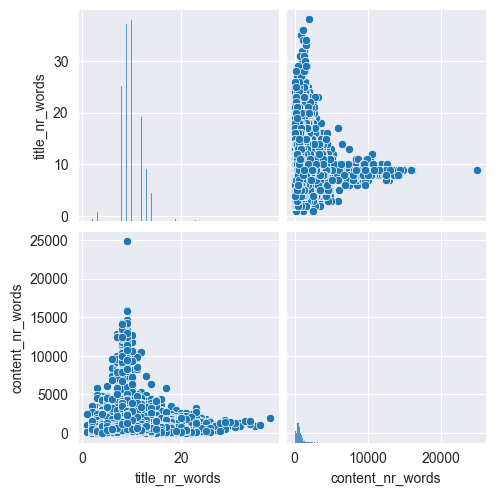

In [20]:
sns.pairplot(news_articles_data[['title_nr_words', 'content_nr_words']])


In [21]:
# Check if nvda is in the text
def check_article_NVIDA_keyword_match(text, key_words = "nvidia|nvda"):
    try:
        if re.search(key_words, text.lower()):
            return True
        else:
            return False
    except AttributeError:
        print(text)
        return False
        
    
def add_nvidia_topic_title_content(df):
    """
    
    :param df: df to process
    :param column_name_to_count: the column name to count the nr of words present
    :return: 
    """
    title_column_name = insert_empty_column_to_df(df=df,
                                                     original_column="title",
                                                     extension="NVIDIA_topic")
    content_column_name = insert_empty_column_to_df(df=df,
                                                     original_column="content",
                                                     extension="NVIDIA_topic")
    
    
    
    for index, row in df.iterrows():
        df.at[index, title_column_name] = check_article_NVIDA_keyword_match(row["title"])
        df.at[index, content_column_name] = check_article_NVIDA_keyword_match(row["content"])

add_nvidia_topic_title_content(news_articles_data)

/var/folders/f3/ykt1vfz96xz48try_trwdn440000gn/T/ipykernel_19209/2647930829.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  news_articles_data.at[index, title_column_name] = check_article_NVIDA_keyword_match(row["title"])
/var/folders/f3/ykt1vfz96xz48try_trwdn440000gn/T/ipykernel_19209/2647930829.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  news_articles_data.at[index, content_column_name] = check_article_NVIDA_keyword_match(row["content"])


nan
nan
nan
nan
nan
nan
nan
nan


In [22]:
news_articles_data

,id,ticker,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,False,12,news,What s happening\nShares of Chinese electric c...,False,269.0,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,False,8,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,False,22.0,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,False,10,news,Gainers NIO NYSE NIO 14 Village Farms In...,False,51.0,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,False,5,news,Cemtrex NASDAQ CETX 85 after FY results \n...,False,115.0,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,False,5,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,False,198.0,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221508,443024,T,Crude And Steel Still In Sync,False,6,opinion,We have been reporting on the trade off betwee...,False,472.0,2012-10-04,Ivan Kitov,https://www.investing.com/analysis/crude-and-s...,138733
221509,443025,T,Forget AT T This Is The Telecom Stock You Sho...,False,11,opinion,It s the largest cell phone provider in the wo...,False,688.0,2012-05-30,StreetAuthority,https://www.investing.com/analysis/forget-at-t...,124829
221510,443026,T,Wall Street Exposed Part 3 How Dividends C...,False,9,opinion,Before we dicuss how the mechanism of dividend...,False,1310.0,2012-07-16,Portfolio Cafe,https://www.investing.com/analysis/wall-street...,129651
221511,443027,T,Weighing The Week Ahead It s All About Jobs,False,9,opinion,From start to finish the coming week will hav...,False,2346.0,2012-09-02,Jeff Miller,https://www.investing.com/analysis/weighing-th...,134926


### Interesting to note that there are 595 articles with NVIDA as a keyword but do not have the correct ticker

In [23]:
news_articles_data[(news_articles_data['ticker'] != "NVDA") & (news_articles_data['title_NVIDIA_topic']== True)]

,id,ticker,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
78,221593,UBER,The Zacks Analyst Blog Highlights Advanced Mi...,True,13,opinion,For Immediate ReleaseChicago IL January 13 ...,True,1650.0,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277
187,221702,UBER,The Zacks Analyst Blog Highlights Toyota Moto...,True,13,opinion,For Immediate ReleaseChicago IL December 3 ...,True,1195.0,2019-12-02,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200489587
196,221711,UBER,NVIDIA Greenbrier Uber Amazon And Apple Hig...,True,15,opinion,For Immediate ReleaseChicago IL November 26...,True,2454.0,2019-11-25,Zacks Investment Research,https://www.investing.com/analysis/nvidia-gree...,200488165
665,222180,UBER,The Zacks Analyst Blog Highlights Alphabet T...,True,12,opinion,For Immediate Release\nChicago IL June 21 ...,True,1005.0,2019-06-20,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200433642
691,222206,UBER,NVIDIA Pushes Self Drive Efforts Must INTC Q...,True,10,opinion,NVIDIA Corporation s NASDAQ NVDA latest co...,True,681.0,2019-06-19,Zacks Investment Research,https://www.investing.com/analysis/nvidia-push...,200432829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221049,442565,AMD,Nvidia NVDA Hits All Time High After Strong ...,True,10,opinion,During the first trading period after AMD s ...,True,521.0,2017-07-26,Zacks Investment Research,https://www.investing.com/analysis/nvidia-(nvd...,200203731
221052,442568,AMD,The Zacks Analyst Blog Highlights Nvidia AMD...,True,11,opinion,For Immediate ReleaseChicago IL August 08 ...,True,1102.0,2017-08-07,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200205961
221105,442621,AMD,Double Top In NVIDIA Time To Short Sell Semic...,True,9,opinion,Semiconductors were real outperformers last ye...,True,322.0,2017-04-11,Taki Tsaklanos,https://www.investing.com/analysis/double-top-...,200182123
221141,442657,AMD,Here s Why Nvidia NVDA Stock Is Gaining Today,True,9,opinion,Shares of Nvidia NASDAQ NVDA are up nearly...,True,231.0,2016-09-27,Zacks Investment Research,https://www.investing.com/analysis/here's-why-...,200155860


# While there are 102 articles that have the ticker NVDA but do not have NVIDIA as a topic

In [47]:
news_articles_data[(news_articles_data['ticker'] == "NVDA")]

,id,ticker,ticker_NVDA_improved,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
199182,420698,NVDA,True,NVIDIA Officially Launches Game Streaming Serv...,True,8,news,Computer hardware company NVIDIA NASDAQ NVDA ...,True,308.0,2020-02-04,The Motley Fool,https://invst.ly/pr2w3,2076127
199183,420699,NVDA,True,Should You Buy NVIDIA Stock At Its Current Val...,True,9,news,NVIDIA NASDAQ NVDA stock has regained its mo...,True,929.0,2020-02-06,The Motley Fool,https://invst.ly/pr-h2,2077999
199184,420700,NVDA,True,NVIDIA s New Cloud Service Could Spell Doom fo...,True,12,news,NVIDIA NASDAQ NVDA recently ended a three ye...,True,796.0,2020-02-07,The Motley Fool,https://invst.ly/psg2m,2079105
199185,420701,NVDA,False,Amazon pulls out of major Barcelona telecoms c...,False,10,news,BERLIN MADRID Reuters Amazon com Inc O AM...,True,410.0,2020-02-09,Reuters,https://www.investing.com/news/technology-news...,2080109
199186,420702,NVDA,True,NVIDIA Stock Rises 3,True,4,news,Investing com NVIDIA NASDAQ NVDA Stock ros...,True,78.0,2020-02-10,Investing.com,https://www.investing.com/news/stock-market-ne...,2080766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200682,422198,NVDA,False,Groupon GRPN Q3 Earnings In Line Revenues M...,False,9,opinion,Groupon Inc NASDAQ GRPN reported non GAAP...,True,708.0,2017-11-01,Zacks Investment Research,https://www.investing.com/analysis/groupon-grp...,200257908
200699,422215,NVDA,False,Is Hubspot HUBS Likely To Beat Q3 Earnings E...,False,9,opinion,HubSpot Inc NYSE HUBS is set to release ...,True,742.0,2017-10-30,Zacks Investment Research,https://www.investing.com/analysis/is-hubspot-...,200257134
200700,422216,NVDA,False,Key Factors Likely To Impact CDW Corp s CDW ...,False,11,opinion,CDW Corporation NASDAQ CDW is scheduled to...,True,658.0,2017-10-30,Zacks Investment Research,https://www.investing.com/analysis/key-factors...,200257037
200708,422224,NVDA,False,Insperity NSP To Report Q3 Earnings What s ...,False,11,opinion,Insperity Inc NYSE NSP is set to release t...,True,542.0,2017-10-29,Zacks Investment Research,https://www.investing.com/analysis/insperity-n...,200257112


In [24]:
news_articles_data[(news_articles_data['ticker'] == "NVDA") & (news_articles_data['title_NVIDIA_topic']!= True)]


,id,ticker,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
199185,420701,NVDA,Amazon pulls out of major Barcelona telecoms c...,False,10,news,BERLIN MADRID Reuters Amazon com Inc O AM...,True,410.0,2020-02-09,Reuters,https://www.investing.com/news/technology-news...,2080109
199187,420703,NVDA,Stocks Wall Street Rebounds From Early Weakn...,False,10,news,By Yasin Ebrahim \nInvesting com Wall Street...,True,345.0,2020-02-10,Investing.com,https://www.investing.com/news/stock-market-ne...,2080863
199189,420705,NVDA,Stocks Wall Street Shrugs off Coronavirus Co...,False,12,news,By Yasin Ebrahim \nInvesting com The S P and...,True,503.0,2020-02-10,Investing.com,https://www.investing.com/news/stock-market-ne...,2080996
199190,420706,NVDA,Cisco Facebook Sprint pull out of Barcelona ...,False,11,news,By Supantha Mukherjee and Joan Faus Reuters ...,True,373.0,2020-02-12,Reuters,https://www.investing.com/news/stock-market-ne...,2081942
199222,420738,NVDA,Israeli tech exits in 2019 doubled to nearly ...,False,10,news,TEL AVIV Reuters The total value of exits ...,True,226.0,2019-12-24,Reuters,https://www.investing.com/news/technology-news...,2047729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200682,422198,NVDA,Groupon GRPN Q3 Earnings In Line Revenues M...,False,9,opinion,Groupon Inc NASDAQ GRPN reported non GAAP...,True,708.0,2017-11-01,Zacks Investment Research,https://www.investing.com/analysis/groupon-grp...,200257908
200699,422215,NVDA,Is Hubspot HUBS Likely To Beat Q3 Earnings E...,False,9,opinion,HubSpot Inc NYSE HUBS is set to release ...,True,742.0,2017-10-30,Zacks Investment Research,https://www.investing.com/analysis/is-hubspot-...,200257134
200700,422216,NVDA,Key Factors Likely To Impact CDW Corp s CDW ...,False,11,opinion,CDW Corporation NASDAQ CDW is scheduled to...,True,658.0,2017-10-30,Zacks Investment Research,https://www.investing.com/analysis/key-factors...,200257037
200708,422224,NVDA,Insperity NSP To Report Q3 Earnings What s ...,False,11,opinion,Insperity Inc NYSE NSP is set to release t...,True,542.0,2017-10-29,Zacks Investment Research,https://www.investing.com/analysis/insperity-n...,200257112


In [46]:
news_articles_data[(news_articles_data['ticker'] == "NVDA") & ((news_articles_data['title_NVIDIA_topic']!= True) & (news_articles_data['content_NVIDIA_topic']!= True))]

,id,ticker,ticker_NVDA_improved,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
199634,421150,NVDA,False,Trump May See Easy Win In 2020 ETFs To Bet On,False,11,opinion,President Donald Trump may see an easy if the...,False,545.0,2019-10-16,Zacks Investment Research,https://www.investing.com/analysis/trump-may-s...,200473863
199656,421172,NVDA,False,Ether Mining Guide How to Mine ETH Cryptocur...,False,8,news,Ethereum ETH is an open source public blockc...,False,1556.0,2018-04-24,Cryptovest,https://www.investing.com/news/cryptocurrency-...,1411794
199676,421192,NVDA,False,Trump May Be Re Elected Best ETFs In His Curr...,False,11,opinion,Republicans might win back the White House in ...,False,554.0,2019-09-19,Zacks Investment Research,https://www.investing.com/analysis/trump-may-b...,200466306


In [49]:
news_articles_data[(news_articles_data['ticker'] != "NVDA") & ((news_articles_data['title_NVIDIA_topic']== True) | (news_articles_data['content_NVIDIA_topic']== True))]


,id,ticker,ticker_NVDA_improved,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
24,221539,NIO,False,A Central Bank War Just Started And Its Good F...,False,11,opinion,ECB Effects\nThe move in the euro was huge fa...,True,711.0,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687
32,221547,NIO,False,6 Stocks To Watch Nivida Could Be Falling,False,8,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,True,542.0,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931
57,221572,NIO,False,Stocks Dow Drops Nearly 400 Points as Apple ...,False,11,news,Investing com A rout in Apple and Facebook ...,True,503.0,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042
78,221593,UBER,True,The Zacks Analyst Blog Highlights Advanced Mi...,True,13,opinion,For Immediate ReleaseChicago IL January 13 ...,True,1650.0,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277
82,221597,UBER,False,The Best Of CES 2020 Revised,False,6,opinion,With 4 500 companies bringing their innovation...,True,1347.0,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221141,442657,AMD,True,Here s Why Nvidia NVDA Stock Is Gaining Today,True,9,opinion,Shares of Nvidia NASDAQ NVDA are up nearly...,True,231.0,2016-09-27,Zacks Investment Research,https://www.investing.com/analysis/here's-why-...,200155860
221166,442682,AMD,False,4 Stocks To Watch Today ATW CWEI MXL SLCA,False,9,opinion,It was a pretty good start to the week on Mond...,True,561.0,2016-05-17,Harry Boxer,"https://www.investing.com/analysis/atw,-cwei,-...",200130262
221189,442705,AMD,False,Here s What The Buy Side Expects From AMD Thur...,False,10,opinion,Advanced Micro Devices Inc NYSE AMD is set ...,True,728.0,2014-04-17,Estimize,https://www.investing.com/analysis/here’s-what...,209915
221468,442984,T,True,Zacks com Featured Highlights AT T Nu Skin E...,True,15,opinion,For Immediate Release\n\nChicago IL July 22...,True,1527.0,2016-07-21,Zacks Investment Research,https://www.investing.com/analysis/zacks.com-f...,200143537


In [51]:
def add_improved_NVDA_ticker_column(df):
    improved_ticker_column = insert_empty_column_to_df(df=df,
                                                        original_column="ticker",
                                                        extension="NVDA_improved")
    for index, row in df.iterrows():
        # if NVDA is ticker but NVDA is not mentioned in the topic or in the content, so must be mistake
        # :TODO remove this clause because the the articles are about it?    
        # ticker is not NVDA but NVIDA is mentioned in the topic or in the content
        if (row['ticker'] != "NVDA") & ((row['title_NVIDIA_topic']== True) | (row['content_NVIDIA_topic']== True)):
            df.at[index, improved_ticker_column] = True
        #NVIDA is the ticker
        elif row['ticker'] == "NVDA":
            df.at[index, improved_ticker_column] = True
        else:
            df.at[index, improved_ticker_column] = False
add_improved_NVDA_ticker_column(news_articles_data)

In [28]:
news_articles_data

,id,ticker,ticker_NVDA_improved,title,title_NVIDIA_topic,title_nr_words,category,content,content_NVIDIA_topic,content_nr_words,release_date,provider,url,article_id
0,221515,NIO,False,Why Shares of Chinese Electric Car Maker NIO A...,False,12,news,What s happening\nShares of Chinese electric c...,False,269.0,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,False,NIO only consumer gainer Workhorse Group amon...,False,8,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,False,22.0,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,False,NIO leads consumer gainers Beyond Meat and Ma...,False,10,news,Gainers NIO NYSE NIO 14 Village Farms In...,False,51.0,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,False,NIO NVAX among premarket gainers,False,5,news,Cemtrex NASDAQ CETX 85 after FY results \n...,False,115.0,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,False,PLUG NIO among premarket gainers,False,5,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,False,198.0,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221508,443024,T,False,Crude And Steel Still In Sync,False,6,opinion,We have been reporting on the trade off betwee...,False,472.0,2012-10-04,Ivan Kitov,https://www.investing.com/analysis/crude-and-s...,138733
221509,443025,T,False,Forget AT T This Is The Telecom Stock You Sho...,False,11,opinion,It s the largest cell phone provider in the wo...,False,688.0,2012-05-30,StreetAuthority,https://www.investing.com/analysis/forget-at-t...,124829
221510,443026,T,False,Wall Street Exposed Part 3 How Dividends C...,False,9,opinion,Before we dicuss how the mechanism of dividend...,False,1310.0,2012-07-16,Portfolio Cafe,https://www.investing.com/analysis/wall-street...,129651
221511,443027,T,False,Weighing The Week Ahead It s All About Jobs,False,9,opinion,From start to finish the coming week will hav...,False,2346.0,2012-09-02,Jeff Miller,https://www.investing.com/analysis/weighing-th...,134926


In [52]:
"""- Number of average documents per news provider
- proportion of documents that are about NVIDIA per news provider 
- proportion of documents that are about NVIDIA corpus as a whole
- average words per article
    - corpus as a whole
    - per news provider
    - per article that is about NVIDIA
    - per article that is about NVIDIA per news provider
- Frequently occurring words
    - when the topic is NVIDIA 
    - when the topic is not NVIDIA
    - we can make this also specific for each news provider, to see if there are differences
    - What is the lexical variation for each of these different interpretations of frequently occurring words?
- Average sentence length
    -  when the topic is NVIDIA 
    - when the topic is not NVIDIA
    - we can make this also specific for each news provider, to see if there are differences"""

news_articles_data.groupby(by=["provider", "ticker_NVDA_improved"])["title_nr_words"].mean()

provider      ticker_NVDA_improved
247wallst     False                   10.600939
              True                    16.666667
4XP           False                    6.545455
ACFX          False                    8.000000
AG Thorson    False                    7.666667
                                        ...    
iFOREX        True                     7.240000
mateusz zdyb  False                    8.500000
news fxbase   False                    4.666667
trade 12      False                    5.939394
              True                     6.333333
Name: title_nr_words, Length: 1107, dtype: float64

In [56]:
# Number of documents per news provider
average_docs_per_provider = news_articles_data.groupby('provider').size().mean()
# Proportion of documents about NVIDIA per news provider
nvidia_proportion_per_provider = news_articles_data.groupby('provider')['ticker_NVDA_improved'].mean()
# Proportion of documents about NVIDIA for the whole corpus
nvidia_proportion_corpus = news_articles_data['ticker_NVDA_improved'].mean()
# Average words per title in the whole corpus
average_words_title_corpus = news_articles_data['title_nr_words'].mean()
# Average words per article in the whole corpus
average_words_content_corpus = news_articles_data['content_nr_words'].mean()
# Average words per title of article per news provider
average_words_title_per_provider = news_articles_data.groupby('provider')['title_nr_words'].mean()
# Average words per article per news provider
average_words_content_per_provider = news_articles_data.groupby('provider')['content_nr_words'].mean()
# Average words per title of article that is about NVIDIA
average_words_title_nvidia = news_articles_data[news_articles_data['ticker_NVDA_improved'] == True]['title_nr_words'].mean()
# Average words per article that is about NVIDIA
average_words_nvidia = news_articles_data[news_articles_data['ticker_NVDA_improved'] == True]['content_nr_words'].mean()

# Average words per title of article about NVIDIA per news provider
average_words_title_nvidia_per_provider = news_articles_data[news_articles_data['ticker_NVDA_improved'] == True].groupby('provider')['title_nr_words'].mean()
# Average words per article about NVIDIA per news provider
average_words_nvidia_per_provider = news_articles_data[news_articles_data['ticker_NVDA_improved'] == True].groupby('provider')['content_nr_words'].mean()



### Domain considerations

How do we make sure that we detect if there if fake news? If most articles within a timeframe say one thing, then when a low number of articles says something completely different, it might be fake. We must read this ourself to find out. Also we can do this separately  for each provider, it is probable that when a news provider has some fake news, it might also result in more fake news when more articles from the same provider.
- Providers that provide fake news, are more likely to have more fake news
- Providers that do not do rigerous research about a topic and have some fake news, are more likely to have other fake news as well.
- The country of origin of a provider might also change the perspective of a news writer. for example in china, where people are not free to say what they want to say. Are more likely to provide content that is in the same line of reasoning as the politics in the country. resulting in more fake news. BUTTTT Fake news is still news and it influences people's buying decision, thus impact the stock price.

# Text cleaning
We must clean the text. there might be mistakes in the text of other content. we don't know for sure, so we have to check for problems in text, this might be provider related as well.

We might also have to consider the authors name in the article, if one author writes fake news, he might write more fake news. We have to check if the name is in the article 

We do not need to check for float numbers, because all the punctuation is removed, the digits that consist of two numberes e.g. "5.2" are represented in the text by "5 2". Therefore, we can have a simple regular expression that checks if a token is represented by pure digits. But if the token is partly digit and partly text, we keep, because strings that consist of characters of digits and text are possibly company names. 

In [71]:
bool(re.search(pattern=r"\d", string="no"))

False

In [93]:
def check_tokens_single_characters(token_word):
    if len(token_word) <=1:
        return False
    else:
        return True
    
def check_token_is_valid_text(token_word):
    return not bool(re.search(pattern=r"^[0-9]*$", string=token_word))
        
    
def clean_tokens_row(list_of_tokens):
    return [token for token in list_of_tokens if check_tokens_single_characters(token) and check_token_is_valid_text(token) ]

clean_tokens_row(["my", "name", "s", "25", "mehdi"])

['my', 'name', 'mehdi']

# TOkenization
We have to think of tokenizing the words, or possible multi word tokens. 

# Text normalization
How will we normalize the text?

If needed reduce vocabulary variation by
- removing numbers
(but what if you need to find dates & amounts?)
-  removing punctuation & special characters (e.g. @#, -, *, ...)
(but what if you need to identify sentiment?)
- convert into lower case
(but what if you need to find names of people & products?)
- lemmatization or stemming
(but what if you unnecessarily increase ambiguity?

Does my corpus have a lot of variation?
• What is the ratio of unique tokens vs. my
total token number?
• Is it likely that I lose information that I need?
• How is modelling affected by the tokens I
remove or normalize?
• Do I remove important text context?

# What data to use for training
I would like to test different things
- Use all the corpus to train the word2vec
- Use only the corpus that have NVIDIA/NVDA as keywords in title or content or have ticket=NVDA. To train the word2vec
- 

# Modeling 

We have two approaches to choose from. We can use skip-gram or bag-of-words. The benefit of skip-gram is that it is better at semantics, but it is computationally more expensive than bag-of-words. 



In [ ]:
def 